### Integrantes


**Nombre Completo:** Edwar Alejandro Ramírez Londoño

**Cédula:** 1060588666

**Correo Institucional:** edwar.ramirez@udea.edu.co


**Nombre Completo:** Sebastian Giraldo Zuluaga

**Cédula:** 1041204644

**Correo Institucional:** sebastian.giraldoz@udea.edu.co


**Nombre Completo:** Hadys Osbaldo Agudelo

**Cédula:** 71721848

**Correo Institucional:** hadys.agudelo@udea.edu.co


### Descripción
El datset descargado de kaggle, contiene 6574 registros de la respuesta diaria promedio de 5 variables climáticas de una estación meteorolígica. Los datos fueron almacenados desde Enero 1961 a Diciembre 1978 (17 años). Precipotaciones promedio, máxima y mínima temperatura, mínima temperatura del cesped fueron tomadas además de la velocidad promedio del viento.

Origen de los datos: https://www.kaggle.com/datasets/fedesoriano/wind-speed-prediction-dataset

### Librerías

In [34]:
import pandas as pd
import numpy as np
from lib import mlutils
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import MissingIndicator # Es una función que permite identificar los datos faltantes

### Preparación de los datos

In [3]:
#Lectura de los datos
pathfile='wind_dataset.csv'
df = pd.read_csv(pathfile, header=0, sep=',')
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [4]:
#Información inicial del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


Se observa que las columnas IND.1 , T.MAX, IND.2, T.MIN y T.MIN.G tiene datos nulos. Adicionalmente como el tipo de columna no es Object indica que los valores diferentes de nulos son de un sólo tipo. La columna DATE se debe transformar a tipo datetime.

In [10]:
# Calcular la cantidad de valores NaN en cada columna
nans_por_col = df.isna().sum()

# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nans_por_col = (nans_por_col / len(df)) * 100

# Crear un DataFrame que muestre los resultados
resultados = pd.concat([nans_por_col, porcentaje_nans_por_col], axis=1, keys=['Cantidad de NaN', 'Porcentaje de NaN'])

resultados = resultados.sort_values(by='Cantidad de NaN', ascending=True)
resultados=resultados.reset_index()
print(resultados)

     index  Cantidad de NaN  Porcentaje de NaN
0     DATE                0           0.000000
1     WIND                0           0.000000
2      IND                0           0.000000
3     RAIN                0           0.000000
4    IND.1               61           0.927898
5    IND.2               61           0.927898
6  T.MIN.G              360           5.476118
7    T.MAX              621           9.446304
8    T.MIN              674          10.252510


Se oberva que los datos faltantes  la columna T.MIN.G, T.MAX y T.MIN, tiene la mayor cantidad de datos faltante con los porcentajes que se muestran en la tabla anterior.

In [14]:
Indicador = MissingIndicator(missing_values = np.nan)
Indicador.fit(df) 
Datos_Indicador = Indicador.transform(df) # Realizamos una transformación Booleana de los datos para identificar los datos faltantes (True)
                                             # y los datos no faltantes (False)
print("Características donde hay datos faltantes: ", Indicador.features_)

Características donde hay datos faltantes:  [4 5 6 7 8]


In [15]:
POS = np.where(Datos_Indicador == True) # Se busca aquellos datos que tiene un valor Booleanos igual a True
print("Porcentaje de Datos Faltantes (%): ", 100*(len(POS[0])/(Datos_Indicador.shape[0]*Datos_Indicador.shape[1])))

Porcentaje de Datos Faltantes (%):  5.40614542135686


In [20]:
## KEEPOUTPUT
k = df.isna().sum()
k[k!=0]

IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [27]:
d=df.copy()

In [28]:
def plot_missing(col, target):
    
    def f1(): 
        if d[col].dtype==object:
            k = d[col].fillna("missing").value_counts()
            sns.barplot(k.index, k.values)
        else:
            sns.distplot(d[col].dropna())
        plt.title("distribution of %s"%col)
        plt.grid()
        
    def f2(): 
        if d[col].dtype==object:
            k=d[[col,target]].dropna()
            for v in d[col].dropna().unique():
                if sum(k[col]==v)>1:
                    sns.distplot(k[target][k[col]==v], 
                                 hist_kws=dict(alpha=.3), 
                                 kde_kws=dict(linewidth=1, alpha=.8),
                                 label=v);
            if sum(d[col].isna())>1:
                sns.distplot(d[target][d[col].isna()], 
                             hist_kws=dict(alpha=.8), 
                             kde_kws=dict(linewidth=1, alpha=1),
                             label="missing")
            plt.legend();
        else:
            plt.scatter(d[col], d[target], alpha=.5)
            plt.xlabel(target)
            plt.ylabel(col)
        plt.grid()
        plt.title("%s vs target"%(col))
        
    def f3(): 
        n = np.sum(d[col].isna())
        if n>1:
            sns.distplot(d[target][d[col].isna()], color="red",  hist_kws=dict(alpha=.3), label="missing (%d values)"%n)
        sns.distplot(d[target][~d[col].isna()], color="blue",  hist_kws=dict(alpha=.3), label="ok (%d values)"%(len(d)-n))
        plt.title("distribution of target wrt %s"%col)
        plt.yticks([])
        plt.grid()
        plt.legend()
        
    mlutils.figures_grid(3,1, [f1, f2, f3], figsize=(20,3))

C:\Users\alejo\AppData\Local\Temp\ipykernel_7704\723706368.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[col].dropna())
C:\Users\alejo\AppData\Local\Temp\ipykernel_7704\723706368.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[target][d[col].isna()], color="red",  hist_kws=dict(al

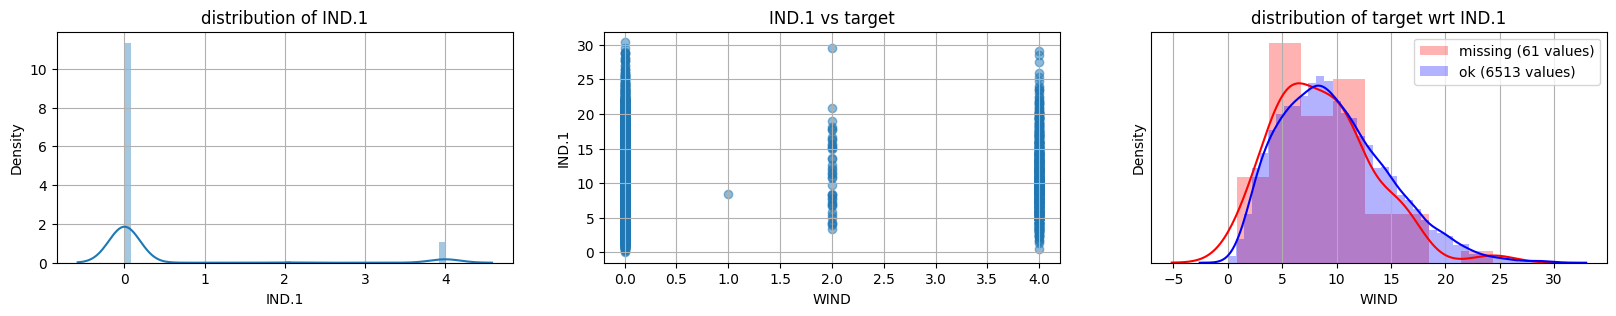

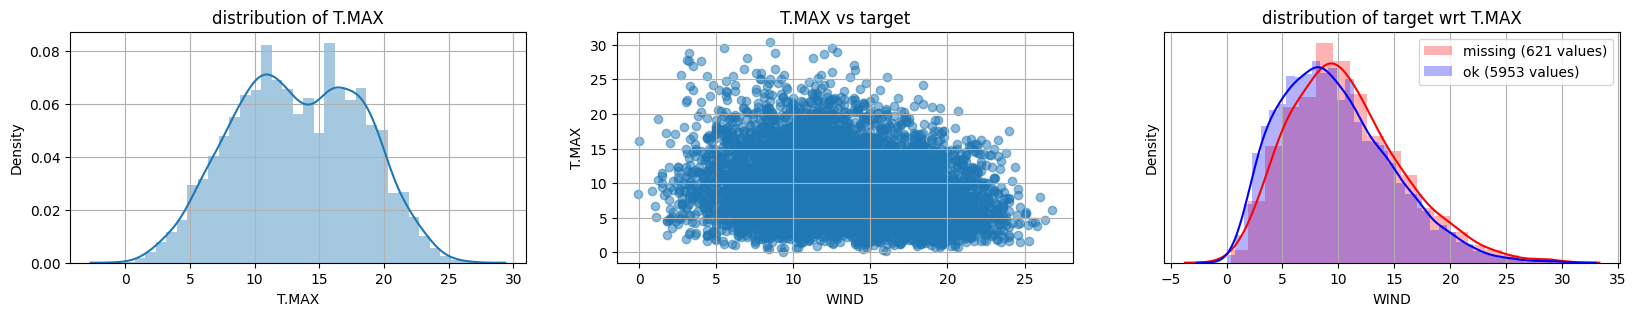

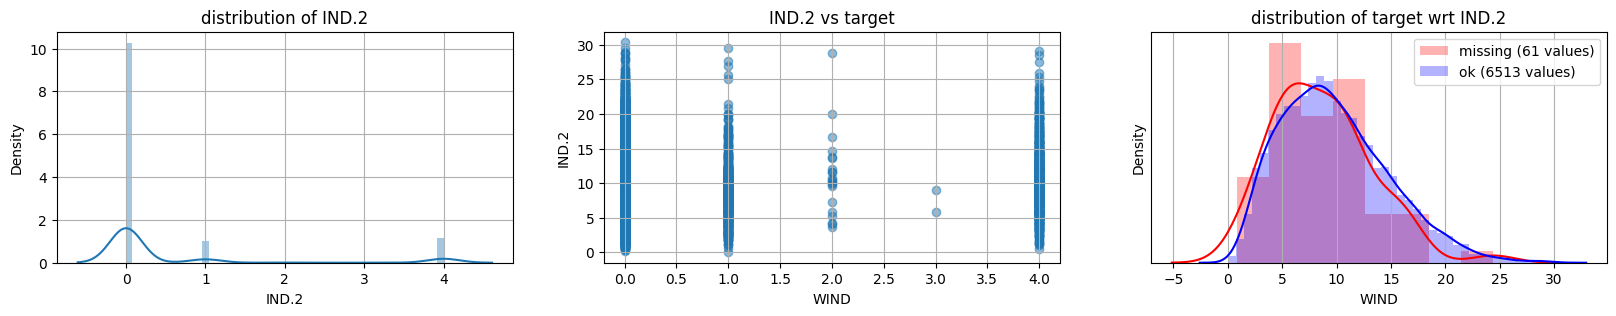

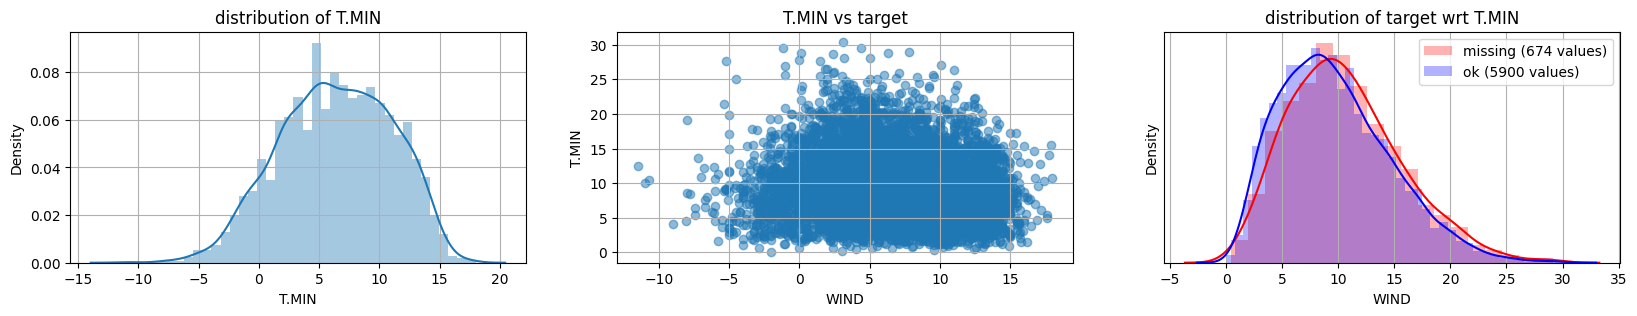

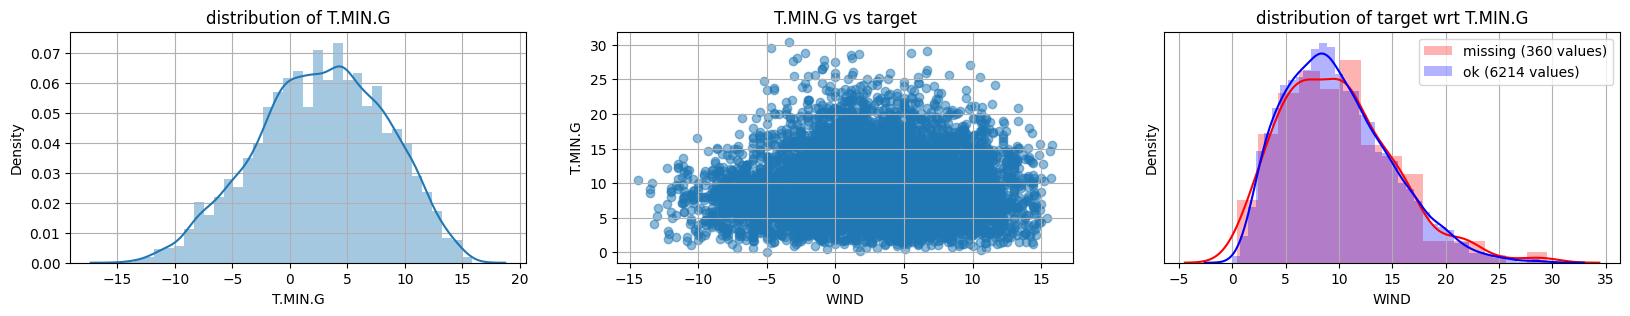

In [35]:
for col in k[k!=0].index:
    plot_missing(col, target="WIND")